# Predicting Loan Interest Rate Case study - I

### Syed Khaleelullah

### To Do:

 - Describe the dataset and any issues with it.
 - Generate a minimum of 5 unique visualizations using the data and write a brief description of your observations. Additionally, all attempts should be made to make the visualizations visually appealing
 - Create a feature set and create a model which predicts interest rate using at least 2 algorithms. Describe any data cleansing that must be performed and analysis when examining the data.
 - Visualize the test results and propose enhancements to the model, what would you do if you had more time. Also describe assumptions you made and your approach.


#### Loans Data Description

This data set represents thousands of loans made through the Lending Club platform, which is a platform that allows individuals to lend to other individuals. Of course, not all loans are created equal. Someone who is a essentially a sure bet to pay back a loan will have an easier time getting a loan with a low interest rate than someone who appears to be riskier. And for people who are very risky? They may not even get a loan offer, or they may not have accepted the loan offer due to a high interest rate. It is important to keep that last part in mind, since this data set only represents loans actually made, i.e. do not mistake this data for loan applications!

 - This loans dataset contains 10,000 records and 55 variables that can be the reason for predicting the interest rates. Let's find out through exploratory data analysis
 - There are some missing values which we will deal with later shown below.
 - There are both categorical and numerical variables present in the dataset.
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
loans_df = pd.read_csv("loans_full_schema.csv")

In [3]:
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [4]:
print("The shape of loans data is: ", loans_df.shape)

The shape of loans data is:  (10000, 55)


# DATA CLEANING

### Let's check how many missing values are there.

In [5]:
loans_df.isnull().sum()

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

#### As we can see above, there any many missing values in a few columns.
#### Let's see the percentage of missing values for those columns.

In [6]:
missing_values = pd.concat([loans_df.isnull().sum(),loans_df.isnull().sum()*100/len(loans_df)],axis=1)

missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
verification_income_joint,8545,85.45
annual_income_joint,8505,85.05
debt_to_income_joint,8505,85.05
months_since_90d_late,7715,77.15
months_since_last_delinq,5658,56.58
months_since_last_credit_inquiry,1271,12.71
emp_title,833,8.33
emp_length,817,8.17
num_accounts_120d_past_due,318,3.18
debt_to_income,24,0.24


### Removing columns that are empty (100% missing values)

In [7]:
loans_df = loans_df.drop(columns = loans_df.isnull().sum().index[loans_df.isnull().sum()==len(loans_df)])

In [8]:
missing_values = pd.concat([loans_df.isnull().sum(),loans_df.isnull().sum()*100/len(loans_df)],axis=1)

missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
verification_income_joint,8545,85.45
annual_income_joint,8505,85.05
debt_to_income_joint,8505,85.05
months_since_90d_late,7715,77.15
months_since_last_delinq,5658,56.58
months_since_last_credit_inquiry,1271,12.71
emp_title,833,8.33
emp_length,817,8.17
num_accounts_120d_past_due,318,3.18
debt_to_income,24,0.24


### Drop columns with greater than 50% missing values

In [9]:
drop_list = missing_values[missing_values['% of Total Values']>50].index
loans_df = loans_df.drop(columns = list(drop_list))

# Dropped columns: verification_income_joint, annual_income_joint, debt_to_income_joint, 
# months_since_90d_late, monhs_since_last_delinq

In [10]:
loans_df.shape

(10000, 50)

In [11]:
missing_values = pd.concat([loans_df.isnull().sum(),loans_df.isnull().sum()*100/len(loans_df)],axis=1)
missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values
months_since_last_credit_inquiry,1271,12.71
emp_title,833,8.33
emp_length,817,8.17
num_accounts_120d_past_due,318,3.18
debt_to_income,24,0.24


#### As obeserved above, only total of 12% data is missing currently.
#### Remove rows for non-numerical columns such as emp_title, emp_length 

In [12]:
loans_df = loans_df[~loans_df.emp_title.isnull()]
loans_df = loans_df[~loans_df.emp_length.isnull()]

#### Let's fill in the numerical columns data using mean, median and mode accordingly.

In [13]:
# Calculate the avg of the column - months_since_last_credit_inquiry
months_last_inquiry = loans_df["months_since_last_credit_inquiry"].astype("float").mean(axis=0)
print("Months since last inquiry:", months_last_inquiry)

# Replace "NaN" by mean value in "months_since_last_credit_inquiry" column
loans_df["months_since_last_credit_inquiry"].replace(np.nan, months_last_inquiry, inplace=True)

Months since last inquiry: 7.35550031075202


In [14]:
# Calculate the avg of the column - months_since_last_credit_inquiry
num_accounts_120 = loans_df["num_accounts_120d_past_due"].astype("float").mean(axis=0)
print("Number of accounts past due:", num_accounts_120)

# Replace "NaN" by mean value in "months_since_last_credit_inquiry" column
loans_df["num_accounts_120d_past_due"].replace(np.nan, num_accounts_120, inplace=True)

Number of accounts past due: 0.0


In [15]:
# Calculate the avg of the column - months_since_last_credit_inquiry
debt_income = loans_df["debt_to_income"].astype("float").mean(axis=0)
print("Debt Income Average:", debt_income)

# Replace "NaN" by mean value in "months_since_last_credit_inquiry" column
loans_df["debt_to_income"].replace(np.nan, debt_income, inplace=True)

Debt Income Average: 18.996415012000917


In [16]:
missing_values = pd.concat([loans_df.isnull().sum(),loans_df.isnull().sum()*100/len(loans_df)],axis=1)
missing_values = missing_values.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
missing_values[missing_values['% of Total Values']>0].sort_values(by='% of Total Values',ascending=False)

,Missing Values,% of Total Values


### As we can see above, now we don't have any missing values

In [17]:
loans_df.isnull().sum()

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

In [18]:
loans_df.shape

(9167, 50)

#### As we can see above, we now don't have any missing values in our dataset and we have reduced our dataset to 9167 records and only 50 columns with no missing values.

In [19]:
loans_df.nunique().sort_values()

num_accounts_120d_past_due             1
term                                   2
current_accounts_delinq                2
application_type                       2
num_accounts_30d_past_due              2
initial_listing_status                 2
disbursement_method                    2
verified_income                        3
issue_month                            3
homeownership                          3
public_record_bankrupt                 4
num_collections_last_12m               4
loan_status                            6
grade                                  7
num_historical_failed_to_pay           9
tax_liens                              9
emp_length                            11
loan_purpose                          12
delinq_2y                             12
num_mort_accounts                     14
num_active_debit_accounts             24
inquiries_last_12m                    25
accounts_opened_24m                   26
months_since_last_credit_inquiry      26
paid_late_fees  

#### We have a column "num_accounts_120d_past_due " that has only 1 attribute, which doesn't contribute much to the analysis. Hence we can drop it.

In [20]:
single_value_list = loans_df.nunique().sort_values()[loans_df.nunique().sort_values()==1]
loans_df = loans_df.drop(columns = list(single_value_list.index))
loans_df.shape

(9167, 49)

### Let's have a look at our data types in our dataset and try to correct it to the right format

In [21]:
loans_df.dtypes

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
delinq_2y                             int64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts             int64
num_accounts_30d_past_due       

### Converting the issue_month to Date Type format

In [22]:
loans_df.issue_month.head()

0    Mar-2018
1    Feb-2018
2    Feb-2018
3    Jan-2018
4    Mar-2018
Name: issue_month, dtype: object

In [23]:
loans_df['issue_month'] = pd.to_datetime(loans_df['issue_month'])

In [24]:
loans_df.issue_month.tail()

9995   2018-01-01
9996   2018-02-01
9997   2018-02-01
9998   2018-02-01
9999   2018-02-01
Name: issue_month, dtype: datetime64[ns]

In [25]:
# Converting the dtype of issue_month Object to datetime format

loans_df.issue_month = pd.to_datetime(loans_df.issue_month, format='%b-%y')

In [26]:
loans_df.issue_month.head()

0   2018-03-01
1   2018-02-01
2   2018-02-01
3   2018-01-01
4   2018-03-01
Name: issue_month, dtype: datetime64[ns]

In [27]:
loans_df['issue_year'] = loans_df['issue_month'].dt.to_period('Y')

In [28]:
loans_df.tail()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,issue_year
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,2008,5,...,2018-01-01,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,2018
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,1994,1,...,2018-02-01,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,2018
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,2004,0,...,2018-02-01,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,2018
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,1999,1,...,2018-02-01,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,2018
9999,operations analyst,3.0,CT,RENT,66000.0,Not Verified,20.82,0,2005,0,...,2018-02-01,Current,whole,Cash,11574.83,1658.56,1225.17,433.39,0.0,2018


In [29]:
loans_df = loans_df.drop('issue_month', 1)

In [30]:
loans_df.issue_year.dt.year.value_counts()

2018    9167
Name: issue_year, dtype: int64

In [31]:
loans_df.shape

(9167, 49)

# DATA ANALYSIS - Univariate

In [32]:
# Resource : https://queirozf.com/entries/add-labels-and-text-to-matplotlib-plots-annotation-examples
def barplot_labels(xs,ys,percent = False):
    plt.clf()

# using some dummy data for this example
    
    plt.figure(figsize=(16,5))
    plt.bar(xs,ys,color = sb.color_palette('husl', 16))

    # zip joins x and y coordinates in pairs
    for x,y in zip(xs,ys):
        label = "{:.2f}".format(y)

        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,10), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

<Figure size 432x288 with 0 Axes>

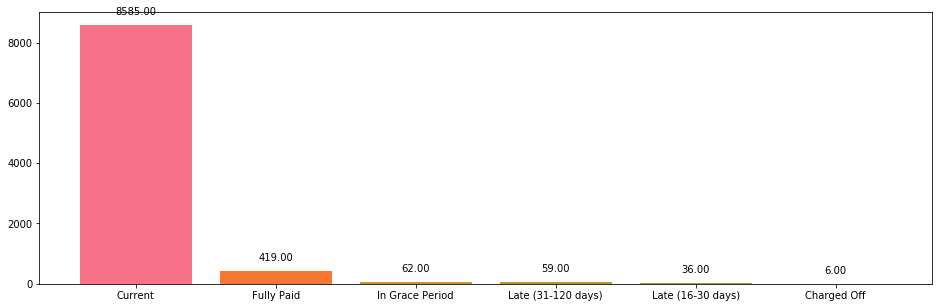

In [33]:
barplot_labels(loans_df.loan_status.value_counts().index, loans_df.loan_status.value_counts())

### Box Plot distribution of loan amount based on loan status

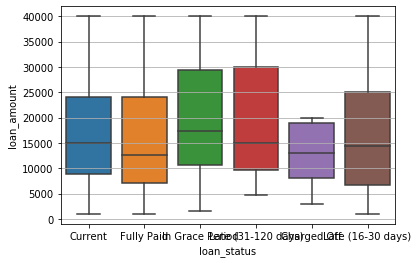

In [34]:
sb.boxplot(data = loans_df,x='loan_status',y='loan_amount')
plt.grid(axis='y')

In [35]:
loans_df['loan_amount_bins'] = pd.cut(x=loans_df['loan_amount'], bins=np.arange(0,36000,5000))

In [46]:
# Resource : https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values
def show_values_on_bars(axs,percent=True, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()+0.4
                if p.get_height()>0 and percent:
                    value = str(int(p.get_height()))+'%'
                elif percent==False and p.get_height()>0:
                    value = str(int(p.get_height()))
                else:
                    value='0%'
                
                ax.text(_x, _y, value, ha="center",fontsize='16') 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

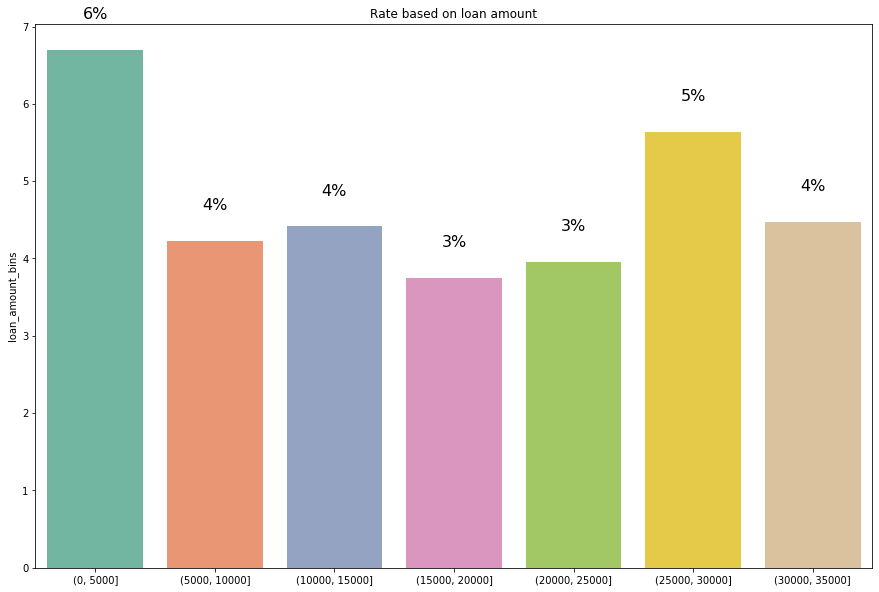

In [51]:
g= (loans_df[loans_df['loan_status']=='Fully Paid'].loan_amount_bins.value_counts()*100/loans_df.loan_amount_bins.value_counts())

plt.figure(figsize=(15,10))
f = sb.barplot(g.index,g,palette=sb.color_palette('Set2', 16))
f.set_title('Rate based on loan amount')

show_values_on_bars(f)

### Interest Rate Analysis

Text(0.5, 1.0, 'Interest Rate Distribution for Current')

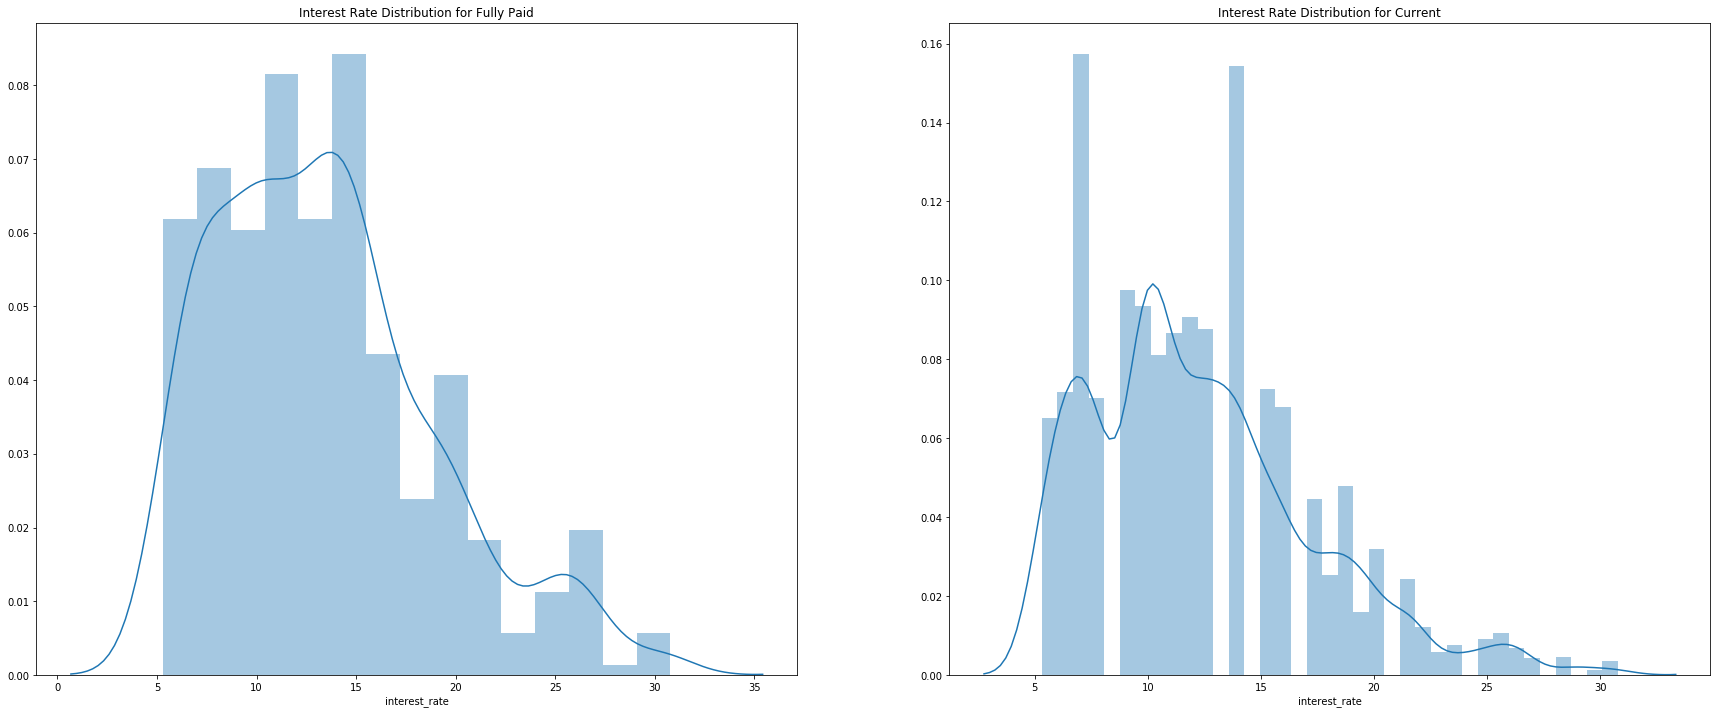

In [48]:
f,axes = plt.subplots(1,2,figsize=(30,12))
sb.distplot(loans_df[loans_df.loan_status=='Fully Paid'].interest_rate,ax = axes[0])
sb.distplot(loans_df[loans_df.loan_status=='Current'].interest_rate,ax = axes[1])
axes[0].set_title("Interest Rate Distribution for Fully Paid")
axes[1].set_title("Interest Rate Distribution for Current")

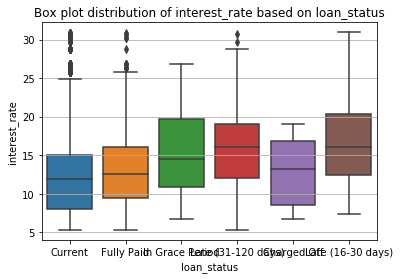

In [49]:
# Box plot distribution of Interest Rate based on Loan_status
ax = sb.boxplot(x = loans_df.loan_status, y=loans_df.interest_rate)
ax.set_title("Box plot distribution of interest_rate based on loan_status")
plt.grid(axis='y')

In [50]:
loans_df.groupby(['loan_status']).interest_rate.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6.0,12.873333,5.169324,6.72,8.575,13.220,16.8225,19.03
Current,8585.0,12.288106,4.928696,5.31,7.970,11.980,15.0500,30.79
Fully Paid,419.0,13.440000,5.548673,5.31,9.440,12.620,16.0200,30.79
In Grace Period,62.0,15.550000,5.838940,6.71,10.910,14.560,19.7575,26.77
Late (16-30 days),36.0,16.948611,6.187187,7.35,12.455,16.015,20.3625,30.94
Late (31-120 days),59.0,16.315254,5.760854,5.31,11.990,16.010,19.0300,30.75


#### Mean of Charged Off loans is higher than any other categories in the loan_status. Hence, loan increases with increase in interest rates.

In [52]:
loans_df['interest_rate_bins'] = pd.cut(x=loans_df['interest_rate'], bins=np.arange(0,25,2.5))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


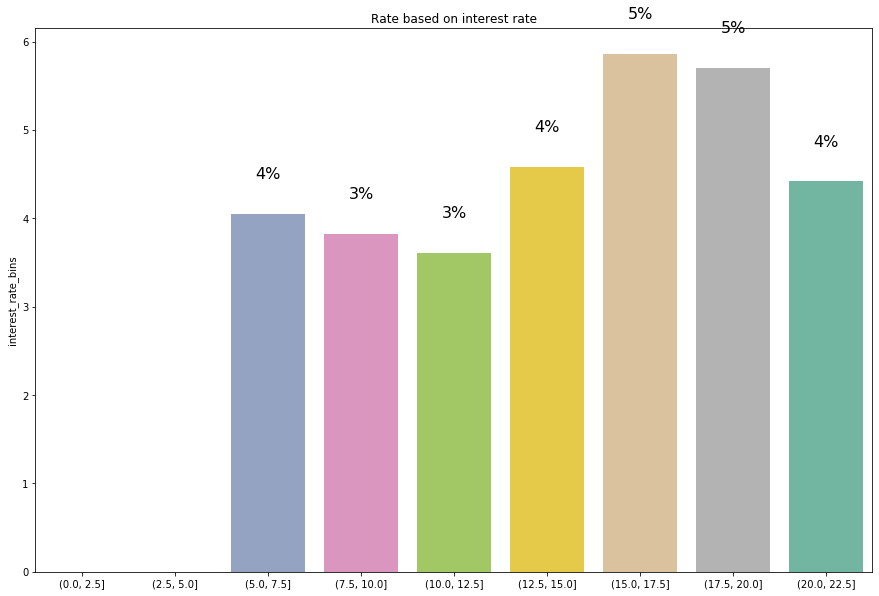

In [56]:
g= (loans_df[loans_df['loan_status']=='Fully Paid'].interest_rate_bins.value_counts()*100/loans_df.interest_rate_bins.value_counts())
plt.figure(figsize=(15,10))
f = sb.barplot(x = g.index, y = g, palette=sb.color_palette('Set2', 16))
f.set_title('Rate based on interest rate')
show_values_on_bars(f)

 #### Analysis
 - 4% and 5% when interest rate is above 12%
 - This shows that with loan amount as the size of loan increases, risk associated increases resulting in higher interest rates
 - Interest rate increases as shown above visualization has direct impact on loan being fully paid

### Debt-to-Income Analysis

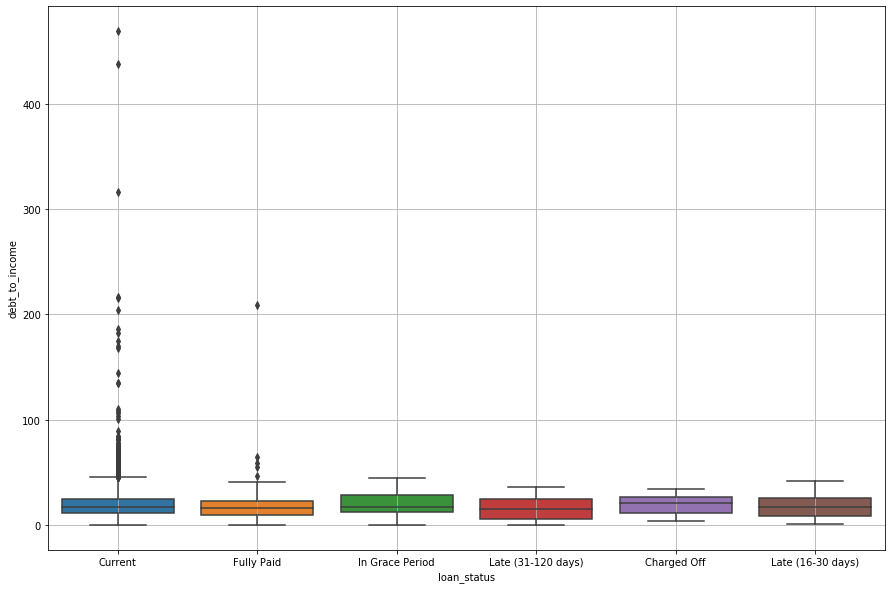

In [64]:
plt.figure(figsize=(15,10))
sb.boxplot(x = 'loan_status', y = 'debt_to_income',data = loans_df)

plt.grid()

In [65]:
loans_df.debt_to_income.describe()

count    9167.000000
mean       18.996415
std        14.198557
min         0.000000
25%        11.030000
50%        17.440000
75%        24.760000
max       469.090000
Name: debt_to_income, dtype: float64

In [66]:
loans_df.groupby(['loan_status']).debt_to_income.describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,6.0,19.713333,11.687319,3.82,12.0225,20.635,27.1475,34.72
Current,8585.0,19.097503,14.284282,0.00,11.1200,17.510,24.8300,469.09
Fully Paid,419.0,17.336730,13.457807,0.00,9.8950,16.110,23.0150,209.10
In Grace Period,62.0,19.772742,11.164906,0.35,12.7100,17.670,28.2850,44.70
Late (16-30 days),36.0,17.699444,10.256529,0.86,8.2900,17.040,25.8475,41.51
Late (31-120 days),59.0,15.976441,10.840740,0.00,6.1600,15.670,24.6500,36.24


In [67]:
loans_df['dti_bucket'] = pd.cut(x = loans_df.debt_to_income, bins=np.arange(0,30,5))

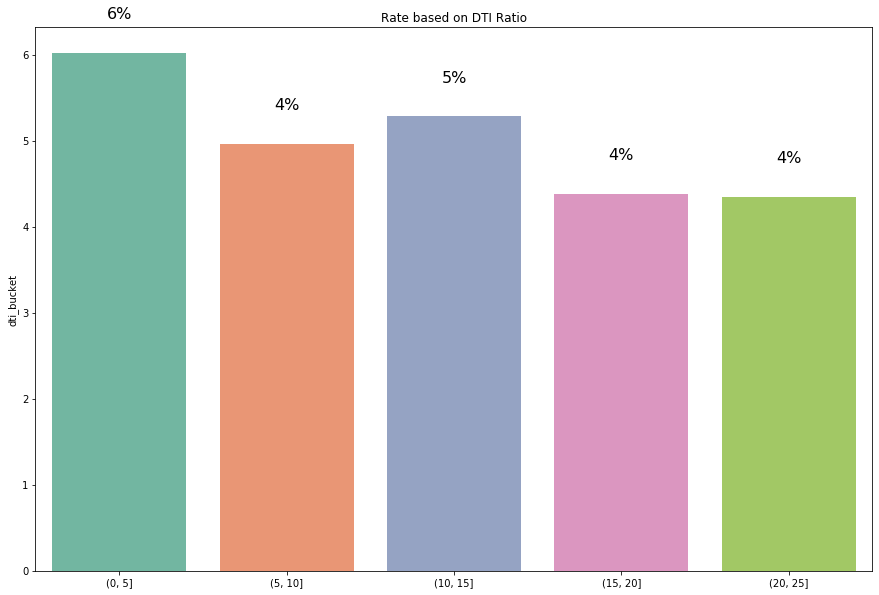

In [68]:
g= (loans_df[loans_df['loan_status']=='Fully Paid'].dti_bucket.value_counts()*100/loans_df.dti_bucket.value_counts())
plt.figure(figsize=(15,10))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('Set2', 16))
f.set_title('Rate based on DTI Ratio')
show_values_on_bars(f)

#### Obersvations on Debt_to_Income Analysis

1. It is clear that with increasing dti the interest rate decreases.
2. High DTI ratio can signal that an individual has too much debt for the amount of income earned each month which explain the reason for high interest rate as shown in the above visualization.

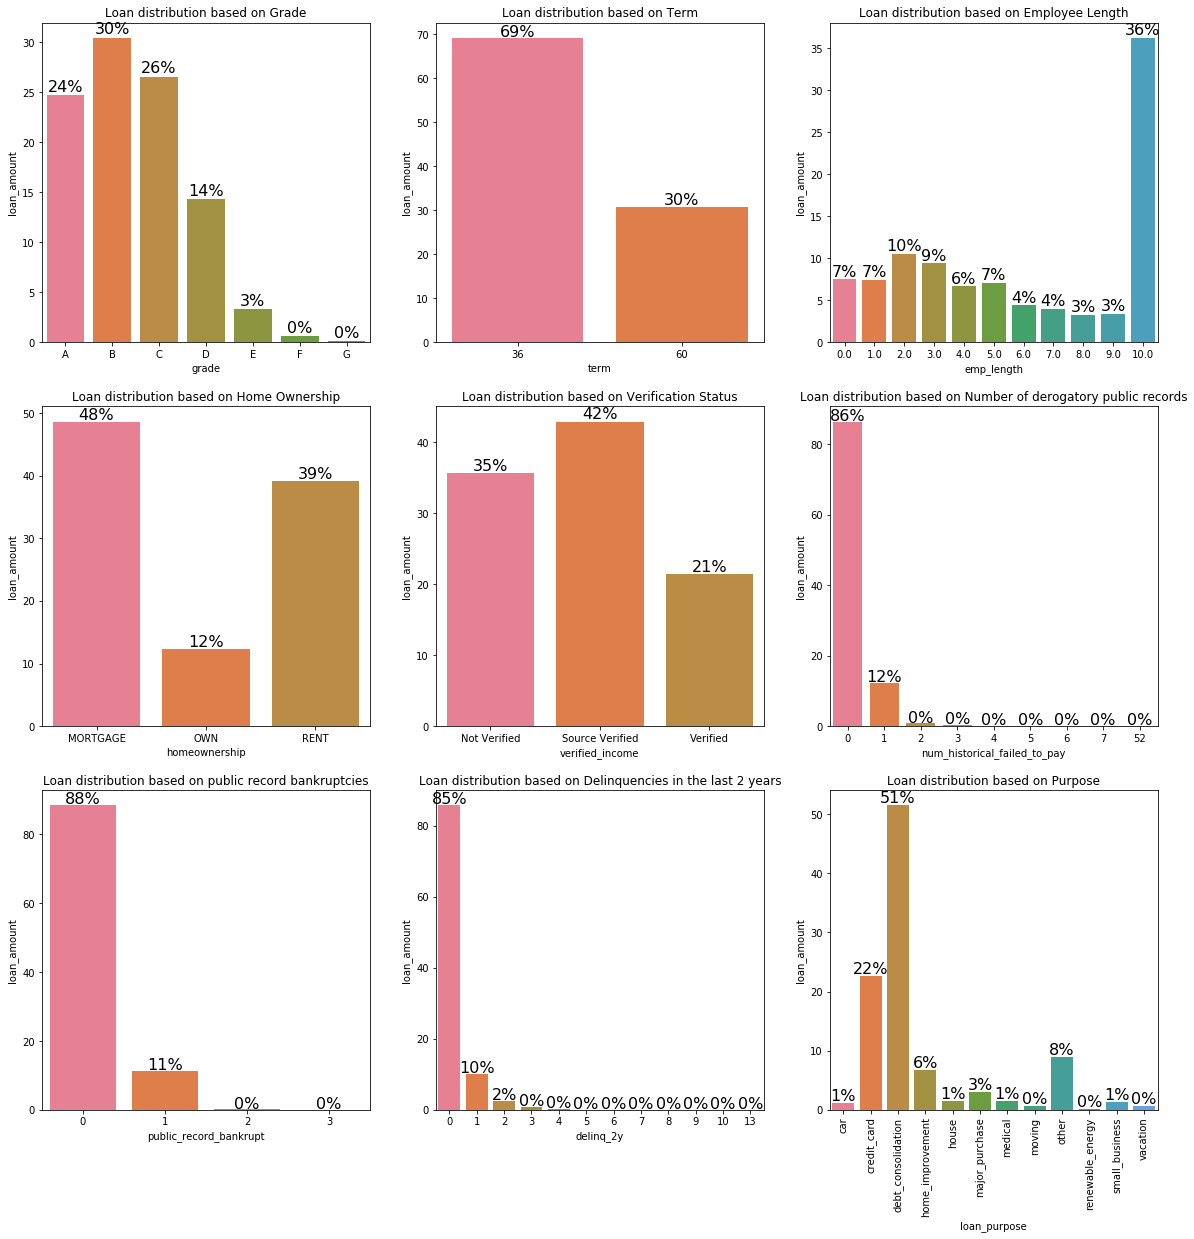

In [73]:
f,axes = plt.subplots(3,3,figsize=(20,20))
#Subplot - 1 Grade
plt.subplot(3,3,1)
g= (loans_df.groupby(['grade']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Grade')
show_values_on_bars(f)

#Subplot - 2 term
plt.subplot(3,3,2)
g= (loans_df.groupby(['term']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Term')
show_values_on_bars(f)

#Subplot - 3 emp_length
plt.subplot(3,3,3)
g= (loans_df.groupby(['emp_length']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Employee Length')
show_values_on_bars(f)

#Subplot - 4 homeownership
plt.subplot(3,3,4)
g= (loans_df.groupby(['homeownership']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Home Ownership')
show_values_on_bars(f)

#Subplot - 5 Verified_income
plt.subplot(3,3,5)
g= (loans_df.groupby(['verified_income']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Verification Status')
show_values_on_bars(f)

#Subplot - 6 Number of derogatory public records
plt.subplot(3,3,6)
g= (loans_df.groupby(['num_historical_failed_to_pay']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Number of derogatory public records')
show_values_on_bars(f)


#Subplot - 7 public records bankruptcies
plt.subplot(3,3,7)
g= (loans_df.groupby(['public_record_bankrupt']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on public record bankruptcies')
show_values_on_bars(f)

#Subplot - 8 delinq_2q
plt.subplot(3,3,8)
g= (loans_df.groupby(['delinq_2y']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Delinquencies in the last 2 years')
show_values_on_bars(f)


#Subplot - 9 loan purpose
plt.subplot(3,3,9)
g= (loans_df.groupby(['loan_purpose']).loan_amount.count()*100/len(loans_df))
f = sb.barplot(x = g.index,y = g,palette=sb.color_palette('husl', 16))
f.set_title('Loan distribution based on Purpose')
f.set_xticklabels(labels = g.index,rotation=90)
show_values_on_bars(f)

### Obersevations from the above plots

1. Most of the loans are based on higher grades loans such as A,B,C.
2. 69% length of loans are given in 36 months.
3. Employees with 10 years of experience take more than 30% of loans.
4. People with rent and mortgages takes up most of the loans.
5. Majority of loans is given to verified income sources.
6. Loans for public record bankruptcies, Delinquiencies in past 2 years and delegatory public records have mostly 0 loans.
7. Loan is mostly given to debt_consolidation category when compared to other category loans.

### Feature Importance

In [74]:
loans_df.columns

Index(['emp_title', 'emp_length', 'state', 'homeownership', 'annual_income',
       'verified_income', 'debt_to_income', 'delinq_2y',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'grade', 'sub_grade', 'loan_status',
       'initial_listing_status',

In [75]:
loans_df.dtypes

emp_title                                  object
emp_length                                float64
state                                      object
homeownership                              object
annual_income                             float64
verified_income                            object
debt_to_income                            float64
delinq_2y                                   int64
earliest_credit_line                        int64
inquiries_last_12m                          int64
total_credit_lines                          int64
open_credit_lines                           int64
total_credit_limit                          int64
total_credit_utilized                       int64
num_collections_last_12m                    int64
num_historical_failed_to_pay                int64
current_accounts_delinq                     int64
total_collection_amount_ever                int64
current_installment_accounts                int64
accounts_opened_24m                         int64


In [76]:
loans_df = loans_df.drop(['emp_title','state','grade', 'sub_grade'], axis=1)

In [78]:
loans_df = loans_df.drop(['loan_amount_bins','interest_rate_bins','dti_bucket'], axis=1)

In [79]:
loans_df.shape

(9167, 45)

In [80]:
loans_df['issue_year'].value_counts()

2018    9167
Freq: A-DEC, Name: issue_year, dtype: int64

In [86]:
loans_df.dtypes

emp_length                                float64
homeownership                              object
annual_income                             float64
verified_income                            object
debt_to_income                            float64
delinq_2y                                   int64
earliest_credit_line                        int64
inquiries_last_12m                          int64
total_credit_lines                          int64
open_credit_lines                           int64
total_credit_limit                          int64
total_credit_utilized                       int64
num_collections_last_12m                    int64
num_historical_failed_to_pay                int64
current_accounts_delinq                     int64
total_collection_amount_ever                int64
current_installment_accounts                int64
accounts_opened_24m                         int64
months_since_last_credit_inquiry          float64
num_satisfactory_accounts                   int64


#### Let's convert the categorical variables to numerical variables.

In [88]:
# Convert the categorical variables to numerical variables.

from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
loans_df.homeownership = le.fit_transform(loans_df.homeownership.values)
loans_df.verified_income = le.fit_transform(loans_df.verified_income.values)
loans_df.loan_purpose = le.fit_transform(loans_df.loan_purpose.values)
loans_df.loan_status = le.fit_transform(loans_df.loan_status.values)
loans_df.application_type = le.fit_transform(loans_df.application_type.values)
loans_df.initial_listing_status = le.fit_transform(loans_df.initial_listing_status.values) 
loans_df.disbursement_method = le.fit_transform(loans_df.disbursement_method.values) 

#Finally let's be sure we convert all fields to numeric
loans_df=loans_df.convert_objects(convert_numeric=True)
loans_df.head(5)

C:\Users\syedk\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,emp_length,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,...,installment,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,issue_year
0,3.0,0,90000.0,2,18.01,0,2001,6,28,10,...,652.53,1,1,0,27015.86,1999.33,984.14,1015.19,0.0,2018
1,10.0,2,40000.0,0,5.04,0,1996,1,30,14,...,167.54,1,1,0,4651.37,499.12,348.63,150.49,0.0,2018
2,3.0,2,40000.0,1,21.15,0,2006,4,31,10,...,71.40,1,0,0,1824.63,281.80,175.37,106.43,0.0,2018
3,1.0,2,30000.0,0,10.16,0,2007,0,4,4,...,664.19,1,1,0,18853.26,3312.89,2746.74,566.15,0.0,2018
4,10.0,2,35000.0,2,57.96,0,2008,7,22,16,...,786.87,1,1,0,21430.15,2324.65,1569.85,754.80,0.0,2018


In [89]:
loans_df.shape

(9167, 45)

Let's verify the data types in our dataset

In [90]:
loans_df.dtypes

emp_length                                float64
homeownership                               int32
annual_income                             float64
verified_income                             int32
debt_to_income                            float64
delinq_2y                                   int64
earliest_credit_line                        int64
inquiries_last_12m                          int64
total_credit_lines                          int64
open_credit_lines                           int64
total_credit_limit                          int64
total_credit_utilized                       int64
num_collections_last_12m                    int64
num_historical_failed_to_pay                int64
current_accounts_delinq                     int64
total_collection_amount_ever                int64
current_installment_accounts                int64
accounts_opened_24m                         int64
months_since_last_credit_inquiry          float64
num_satisfactory_accounts                   int64


In [83]:
loans_df.columns

Index(['emp_length', 'homeownership', 'annual_income', 'verified_income',
       'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'interest_rate', 'installment', 'loan_status', 'initial_listing_status',
       'disbursement_method', 'balance', 'paid_tot

In [92]:
features = ['emp_length', 'homeownership', 'annual_income', 'verified_income',
       'debt_to_income', 'delinq_2y', 'earliest_credit_line',
       'inquiries_last_12m', 'total_credit_lines', 'open_credit_lines',
       'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m'
            , 'num_historical_failed_to_pay',
       'current_accounts_delinq', 'total_collection_amount_ever',
       'current_installment_accounts', 'accounts_opened_24m',
       'months_since_last_credit_inquiry', 'num_satisfactory_accounts',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_purpose', 'application_type', 'loan_amount', 'term',
       'installment', 'loan_status', 'initial_listing_status',
       'disbursement_method', 'balance', 'paid_total', 'paid_principal',
       'paid_interest', 'paid_late_fees']

X = loans_df[features]
y = loans_df['interest_rate']

Feature: 0, Score: -0.00500
Feature: 1, Score: 0.18544
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.64591
Feature: 4, Score: 0.01796
Feature: 5, Score: 0.23073
Feature: 6, Score: 0.01323
Feature: 7, Score: 0.07352
Feature: 8, Score: -0.00310
Feature: 9, Score: 0.01995
Feature: 10, Score: -0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.50683
Feature: 13, Score: -0.00300
Feature: 14, Score: -1.50548
Feature: 15, Score: -0.00000
Feature: 16, Score: -0.05047
Feature: 17, Score: 0.10263
Feature: 18, Score: -0.01348
Feature: 19, Score: -0.00639
Feature: 20, Score: -1.50548
Feature: 21, Score: 0.01529
Feature: 22, Score: -0.00002
Feature: 23, Score: -0.02272
Feature: 24, Score: -0.08824
Feature: 25, Score: 0.17709
Feature: 26, Score: -0.12246
Feature: 27, Score: -0.02912
Feature: 28, Score: 0.02831
Feature: 29, Score: -0.03130
Feature: 30, Score: 0.06171
Feature: 31, Score: -0.17549
Feature: 32, Score: -0.00087
Feature: 33, Score: 0.33561
Feature: 34, Score: 0.02829
Feature: 35

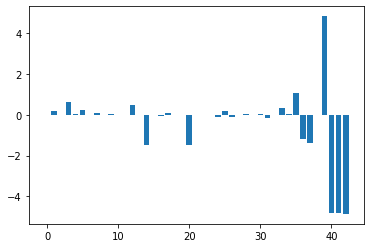

In [95]:
from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib import pyplot

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get importance
importance = model.coef_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

C:\Users\syedk\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


Feature: 0, Score: 0.00124
Feature: 1, Score: 0.00104
Feature: 2, Score: 0.00466
Feature: 3, Score: 0.00095
Feature: 4, Score: 0.00372
Feature: 5, Score: 0.00061
Feature: 6, Score: 0.00166
Feature: 7, Score: 0.00156
Feature: 8, Score: 0.00153
Feature: 9, Score: 0.00073
Feature: 10, Score: 0.00371
Feature: 11, Score: 0.00224
Feature: 12, Score: 0.00053
Feature: 13, Score: 0.00014
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00216
Feature: 16, Score: 0.00283
Feature: 17, Score: 0.00306
Feature: 18, Score: 0.00187
Feature: 19, Score: 0.00082
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00216
Feature: 22, Score: 0.06164
Feature: 23, Score: 0.00228
Feature: 24, Score: 0.00096
Feature: 25, Score: 0.00131
Feature: 26, Score: 0.00116
Feature: 27, Score: 0.00164
Feature: 28, Score: 0.00007
Feature: 29, Score: 0.00010
Feature: 30, Score: 0.00168
Feature: 31, Score: 0.00009
Feature: 32, Score: 0.01342
Feature: 33, Score: 0.03986
Feature: 34, Score: 0.00889
Feature: 35, Score: 0.01149
Fe

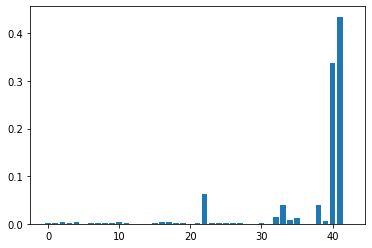

In [96]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib import pyplot

# define the model
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### After going through feature selection (from feature selection model), we can select the variables that are important and perform our machine learning model to predict the interest rate.


## Machine learning models

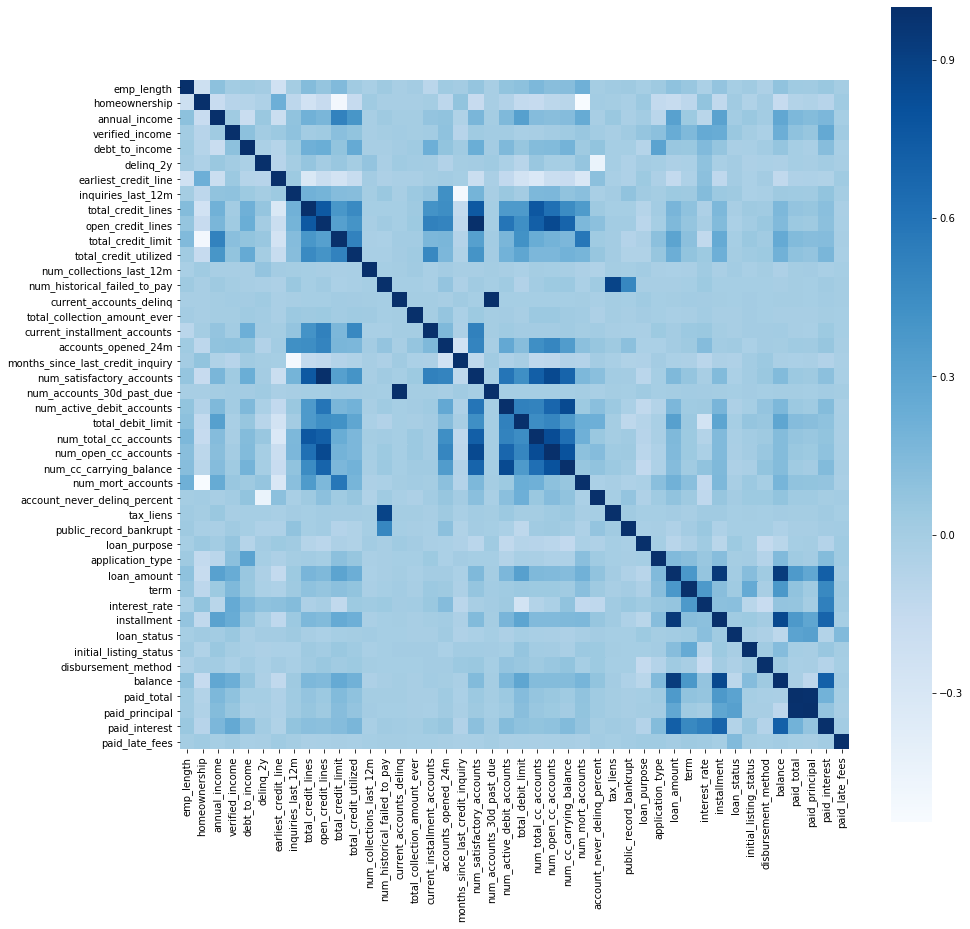

In [98]:
fig, ax = plt.subplots(figsize=(15,15))
sb.heatmap(loans_df.corr(), square=True, cmap="Blues");

## - Linear Regression For Prediction Of Interest Rate

In [136]:
from sklearn.model_selection import train_test_split

x = loans_df[['emp_length','loan_amount','annual_income','homeownership', 'debt_to_income', 'num_active_debit_accounts',
             'application_type', 'loan_amount', 'term', 'installment', 'loan_status', 'initial_listing_status','balance',
              'paid_total','paid_interest', 'paid_late_fees']].values
y = loans_df[['interest_rate']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

algo = LinearRegression()
print ("Number of inputs: ",len(y_train))
model = algo.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred=np.round(y_pred,2)

print("--------Linear Regression--------")
print()

# R-SQUARED ERROR
print ("R-SQUARED ERROR: ", metrics.r2_score(y_train, train_pred))
print()

# MEAN ABSOLUTE ERROR
print ("MEAN ABSOLUTE ERROR is: ", metrics.mean_absolute_error(y_test, y_pred))
print()

# MEAN SQUARED ERROR
print ("MEAN SQUARED ERROR is: ", metrics.mean_squared_error(y_test, y_pred))
print()

print
errors = []
for i,j in zip(y_test, y_pred):
    if abs(i-j)<3:
        errors.append(abs(i-j))

Number of inputs:  6416
--------Linear Regression--------

R-SQUARED ERROR:  0.7081554641782999

MEAN ABSOLUTE ERROR is:  2.1110687022900763

MEAN SQUARED ERROR is:  7.383975172664486



Error distribution plot:


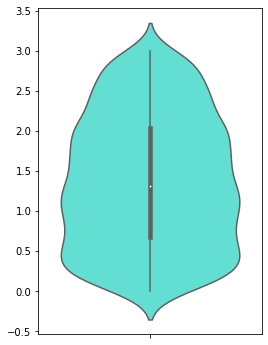

In [138]:
plt.figure(figsize=(4,6))
print("Error distribution plot:")
sb.violinplot(y=errors, color="#4ff2e2")

In [139]:
B= 1-np.mean(errors)/ loans_df.interest_rate.mean()

In [140]:
print('Accuracy for interest rate prediction is:' ,B*100)

Accuracy for interest rate prediction is: 88.96504984822451


## - Gradient Boosting Regressor For Prediction Of Interest Rate

In [153]:
from sklearn.model_selection import train_test_split

x = loans_df[['emp_length','loan_amount','annual_income','homeownership', 'debt_to_income', 'num_active_debit_accounts',
             'application_type', 'loan_amount', 'term', 'installment', 'loan_status', 'initial_listing_status','balance',
              'paid_total','paid_interest', 'paid_late_fees']].values
y = loans_df[['interest_rate']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [154]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

algo = GradientBoostingRegressor(n_estimators=110)
print ("Number of inputs: ",len(y_train))
model = algo.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred=np.round(y_pred,2)

print("--------Gradient Boosting Regressor--------")
print()

# R-SQUARED ERROR
print ("R-SQUARED ERROR: ", metrics.r2_score(y_train, train_pred))
print()

# MEAN ABSOLUTE ERROR
print ("MEAN ABSOLUTE ERROR is: ", metrics.mean_absolute_error(y_test, y_pred))
print()

# MEAN SQUARED ERROR
print ("MEAN SQUARED ERROR is: ", metrics.mean_squared_error(y_test, y_pred))
print()

print
errors = []
for i,j in zip(y_test, y_pred):
    if abs(i-j)<3:
        errors.append(abs(i-j))

Number of inputs:  6416


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprec

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/

--------Gradient Boosting Regressor--------

R-SQUARED ERROR:  0.910290643481589

MEAN ABSOLUTE ERROR is:  1.1631588513267903

MEAN SQUARED ERROR is:  3.0257102508178852



Error distribution plot:


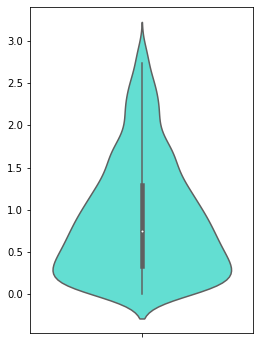

In [155]:
plt.figure(figsize=(4,6))
print("Error distribution plot:")
sb.violinplot(y=errors, color="#4ff2e2")

In [156]:
A= 1-np.mean(errors)/ loans_df.interest_rate.mean()

In [157]:
print('Accuracy for interest rate prediction is:' ,A*100)

Accuracy for interest rate prediction is: 92.77621424576516


## - XGBoost Regression For Prediction Of Interest Rate

In [148]:
from sklearn.model_selection import train_test_split

x = loans_df[['emp_length','loan_amount','annual_income','homeownership', 'debt_to_income', 'num_active_debit_accounts',
             'application_type', 'loan_amount', 'term', 'installment', 'loan_status', 'initial_listing_status','balance',
              'paid_total','paid_interest', 'paid_late_fees']].values
y = loans_df[['interest_rate']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [149]:
from xgboost import XGBRegressor
from sklearn import metrics

algo = XGBRegressor()
print ("Number of inputs: ",len(y_train))
model = algo.fit(X_train, y_train)

train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred=np.round(y_pred,2)

print("--------XGBoost Regression--------")
print()

# R-SQUARED ERROR
print ("R-SQUARED ERROR: ", metrics.r2_score(y_train, train_pred))
print()

# MEAN ABSOLUTE ERROR
print ("MEAN ABSOLUTE ERROR is: ", metrics.mean_absolute_error(y_test, y_pred))
print()

# MEAN SQUARED ERROR
print ("MEAN SQUARED ERROR is: ", metrics.mean_squared_error(y_test, y_pred))
print()

print
errors = []
for i,j in zip(y_test, y_pred):
    if abs(i-j)<3:
        errors.append(abs(i-j))

Number of inputs:  6416
--------XGBoost Regression--------

R-SQUARED ERROR:  0.995235735112659

MEAN ABSOLUTE ERROR is:  0.8060305278442504

MEAN SQUARED ERROR is:  1.958528048619358



Error distribution plot:


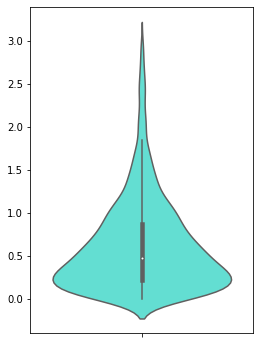

In [150]:
plt.figure(figsize=(4,6))
print("Error distribution plot:")
sb.violinplot(y=errors, color="#4ff2e2")

In [151]:
C= 1-np.mean(errors)/ loans_df.interest_rate.mean()

In [152]:
print('Accuracy for interest rate prediction is:' ,C*100)

Accuracy for interest rate prediction is: 94.98062172766521


### Linear Regression Model

- The first model I selected to predict interest rates was a Linear regression model using scikitlearn's LinearRegression. Linear regression is an attractive model because the representation is so simple. The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). As such, both the input values (x) and the output value are numeric. 

- I used Scikit-learn's LinearRegression() default parameters that are tested on the training data and these parameter that produces the highest accuracy scores will be stored in the model object for predictions.  An advantage of using linear regression models is their relative ease of use, fast computation times, and straightforward deployment and maintenance in production environments.

### Gradient Boosting Regressor Model

- The second model that I have worked with is Gradient Boosting Regressor algorithm.
- As the name suggest "Gradient Boosting", this model is a boosting technique.
- The objective of Gradient Boosting is to minimize the loss function of the model by adding weak learners using gradient decent. Gradient Decent is a first-order iterative optimisation algorithm for finding a local minimum of a differentiable function. As gradient boosting is based on minimising a loss function, different types of loss functions can be used resulting in a flexible technique that can be applied to regression, multi-class classification, etc.
- Intuitively, gradient boosting is a stage-wise additive model that generates learners during the learning process (i.e., trees are added one at a time, and existing trees in the model are not changed). The contribution of the weak learner to the ensemble is based on the gradient descent optimisation process. The calculated contribution of each tree is based on minimising the overall error of the strong learner.
- By using this model, I was able to predict an accuracy rate of 92.7% in predicting the interest rate.


### Extreme Gradient Boosting (XGBoost) Model

- The final model I selected to predict interest rates was a Extreme Gradient Boosting(XGBoost) regression model using scikitlearn's XGBoost Gradient Boosting Regressor Model.

- XGBoost is one of the most popular variants of gradient boosting. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost is basically designed to enhance the performance and speed of a Machine Learning model. In prediction problems involving unstructured data (images, text, etc.), artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree-based algorithms are considered best-in-class right now. 

- XGBoost uses pre-sorted algorithm & histogram-based algorithm for computing the best split. The histogram-based algorithm splits all the data points for a feature into discrete bins and uses these bins to find the split value of the histogram. Also, in XGBoost, the trees can have a varying number of terminal nodes and left weights of the trees that are calculated with less evidence is shrunk more heavily.

- I specifically used XGBoost's python module xgboost as it provides relatively high customization options for hyperparameters and relatively fast processing with its built-in parellel processing when building decision trees. This result in the best evaluation scores from the rest of the models that I worked with as shown above. This model predicted an accuracy rate of 94% in predicting the interest rate.
